# B.Tech 2016-20 Electrical Enginnering (Spring 2018)

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import json
from scipy.stats import norm

In [3]:
with open('stres.json') as f:
    data = json.load(f)
    # Filter out 16EE data
    data = {k:v for (k,v) in data.items() if '16EC' in k[:4]}
    
for (k,v) in data.items():
    print(k,v['cgpa'][1])
    
with open('course.json') as c:
    cdata = json.load(c)
    
print ("Total Stuents: %s" % len(data))


16EC01016 8.04
16EC01017 8.36
16EC01014 8.60
16EC01012 9.15
16EC01013 8.74
16EC01010 8.15
16EC01011 8.55
16EC01018 8.51
16EC01007 8.57
16EC01029 8.00
16EC01028 9.02
16EC01023 9.17
16EC01022 7.51
16EC01021 7.96
16EC01020 6.20
16EC01027 8.72
16EC01026 6.89
16EC01025 6.89
16EC01024 6.40
16EC01038 6.38
16EC01039 7.11
16EC01034 6.40
16EC01035 5.96
16EC01036 6.62
16EC01037 6.13
16EC01030 8.40
16EC01031 8.89
16EC01032 7.62
16EC01033 7.94
16EC01005 8.26
16EC01041 9.53
16EC01040 7.74
16EC01043 9.21
16EC01042 9.43
16EC01045 8.74
16EC01044 8.91
16EC01046 8.62
16EC01004 9.17
16EC01006 7.02
16EC01001 8.09
16EC01003 8.55
16EC01002 9.06
16EC01009 8.47
16EC01008 8.66
Total Stuents: 44


## Date of Birth analysis

In [4]:
dob = [v['dob'] for (k, v) in data.items()]

np_dob = (np.array(dob, dtype='datetime64[s]').view('i8'))
average_dob = np.mean(np_dob).astype('datetime64[s]').astype(dt.datetime)
median_dob  = np.median(np_dob).astype('datetime64[s]').astype(dt.datetime)
minimum_dob = np.min(np_dob).astype('datetime64[s]').astype(dt.datetime)
maximum_dob = np.max(np_dob).astype('datetime64[s]').astype(dt.datetime)
print (" Average: %s" % average_dob.strftime("%8B %d, %Y"))
print ("  Median: %s" % median_dob.strftime("%8B %d, %Y"))
print ("  Oldest: %s" % minimum_dob.strftime("%8B %d, %Y"))
print ("Youngest: %s" % maximum_dob.strftime("%8B %d, %Y"))

 Average:  October 07, 1998
  Median: November 07, 1998
  Oldest:    April 13, 1997
Youngest: December 30, 1999


## Branch Change Analysis

In [8]:
original_strengeth = 40
bc_cgpa = [v['cgpa'][1] for (k, v) in data.items() if (int(k[-2:]) > 40 and v['cgpa'][2] !='WH')]
cgpa = [v['cgpa'][2] for (k,v) in data.items() if v['cgpa'][2] != 'WH' ]

bc_cgpa = (np.array(bc_cgpa, dtype='float'))
cgpa = (np.array(cgpa, dtype='float'))

if len(bc_cgpa>0):
    bc_count = bc_cgpa.size
    bc_highest = np.max(bc_cgpa)
    bc_lowest = np.min(bc_cgpa)
    bc_average = np.mean(bc_cgpa)
    bc_median = np.median(bc_cgpa)
    bc_std = np.std(bc_cgpa)
    print ("Total branch changers: %s" % bc_count)
    print ("\nCGPA (after 2nd sem) for branch change:-")
    print ("Highest: %s" % bc_highest)
    print (" Lowest: %s" % bc_lowest)
    print ("Average: %s" % bc_average)
    print (" Median: %s" % bc_median)
    print("Standard Deviation: %s " %bc_std)
else:
    print('no branch changer')
    pass


Total branch changers: 6

CGPA (after 2nd sem) for branch change:-
Highest: 9.53
 Lowest: 8.62
Average: 9.073333333333334
 Median: 9.06
Standard Deviation: 0.34101156708957675 


## Course wise analysis

In [6]:
courses = dict()
for (k, v) in data.items():
    for (sem, scourses) in v['grades'].items():
        for (course, grade) in scourses.items():
            if course not in courses:
                courses[course] = list()
                courses[course].append(grade)
            else:
                courses[course].append(grade)

clist = list()

def other_grade(l):
    return len(l) - l.count('EX') - l.count('A') - l.count('B') - l.count('C') - l.count('D') - l.count('P') - l.count('F') - l.count('WH')

def analyze_grade(l):
    grade_hash = {'EX': 10, 'A': 9, 'B': 8, 'C': 7, 'D': 6, 'P': 5, 'F': 5}
    hashed_grade = list()
    for grade in l:
        if grade in grade_hash:
            hashed_grade.append(grade_hash[grade])
    hashed_grade = (np.array(hashed_grade, dtype='float'))
    if hashed_grade.size == 0:
        return {'average': 0, 'median': 0}
    return {'average': round(np.mean(hashed_grade), 2), 'median': round(np.median(hashed_grade), 2)}

grade_labels = 'EX', 'A', 'B', 'C', 'D', 'P', 'F', 'WH', 'Other'
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'orange', 'red', 'gray', 'black']

for course, grades in courses.items():
    course_info = cdata[course]
    clist.append((course, course_info['subnane'], course_info['credit'], len(grades), grades.count('EX'), grades.count('A'), 
                 grades.count('B'), grades.count('C'), grades.count('D'), grades.count('P'),
                 grades.count('F'), grades.count('WH'), other_grade(grades), analyze_grade(grades)['average'], analyze_grade(grades)['median']))
#     patches, texts = plt.pie([grades.count('EX'), grades.count('A'), 
#                  grades.count('B'), grades.count('C'), grades.count('D'), grades.count('P'),
#                  grades.count('F'), grades.count('WH'), other_grade(grades)], labels=grade_labels, colors=colors)
#     plt.axis('equal')
#     plt.legend(patches, labels, loc="best")
#     plt.show()
def sortByAverage(element):
    return element[-2]

clist.sort(key=sortByAverage)
df = pd.DataFrame(data = clist)
df.columns = ['Subject Code', 'Subject Name', 'Credits', 'Students', 'EX', 'A', 'B', 'C', 'D', 'P', 'F', 'WH', 'Other', 'Average', 'Median']

df

,Subject Code,Subject Name,Credits,Students,EX,A,B,C,D,P,F,WH,Other,Average,Median
0,PH1L001,Physics,4,44,0,5,13,13,7,6,0,0,0,7.09,7.0
1,ME1L001,Mechanics,4,44,1,8,9,13,6,7,0,0,0,7.18,7.0
2,EC2L001,Introduction to Electronics,4,88,5,16,22,15,11,15,4,0,0,7.23,7.0
3,HS2L004,Odissi Dance - I,3,9,0,2,2,0,4,0,0,1,0,7.25,7.0
4,MA2L003,Probability Statistics and Stochastic Processes,4,44,2,9,10,12,4,7,0,0,0,7.36,7.0
5,EC2L002,Signals and Systems,4,44,1,9,19,8,1,5,1,0,0,7.61,8.0
6,ME2L501,Elements of Mechanical Engineering,3,26,1,5,8,8,3,1,0,0,0,7.62,8.0
7,MA1L002,Mathematics - II,4,44,4,13,9,7,5,6,0,0,0,7.68,8.0
8,EC2L005,Analog Communication,4,44,1,11,17,7,3,3,1,1,0,7.72,8.0
9,ID2L001,Entrepreneurship and Small Business Management,3,62,5,11,23,14,5,3,1,0,0,7.76,8.0


## CGPA Analysis

Top 5 Students:

16EC01023  ARVIND T.K.R  9.46
16EC01041  MEGHNA CHINMOY SAHA  9.44
16EC01004  ADYASHA CHAKRAVARTY  9.17
16EC01043  KUMAR ANKUL  9.00
16EC01042  MARRI K L MOUNIKA  8.97
Students with theri cgpa :

16EC01001  ARPIT BAL  8.21
16EC01002  DONGALA SUDEEPA  8.88
16EC01003  ADITYA TERKAR  8.68
16EC01004  ADYASHA CHAKRAVARTY  9.17
16EC01005  RAHUL SABNANI  8.04
16EC01006  JAMPALA VISHNU TEJA  7.03
16EC01007  KADIVENDI ROHITH  8.51
16EC01008  MANDAVA SAI RAGHAVENDRA DINESH  8.26
16EC01009  MUTHALURU CHAITANYA SHIVA KUMAR REDDY  8.60
16EC01010  DHULIPALLA SAI KIRAN  8.18
16EC01011  ABDUL AZGAR TAJ  8.11
16EC01012  VIJAY SURYA VEMPATI  8.96
16EC01013  NIGHUT CHIRAG ASHOK  8.75
16EC01014  PRAHARSH DEEP SINGH  8.41
16EC01016  SAHUKAR NIKHIL PANDA  8.08
16EC01017  LAKSHMIREDDIPALLE VARUN KUMAR REDDY  8.42
16EC01018  CHIRAG MALHAN  8.55
16EC01020  RAHUL KUMAR SINGH  6.18
16EC01021  KAMALAPADU SAHITHYA  7.86
16EC01022  SURISETTI ANIL  7.82
16EC01023  ARVIND T.K.R  9.46
16EC01024  DUPPA

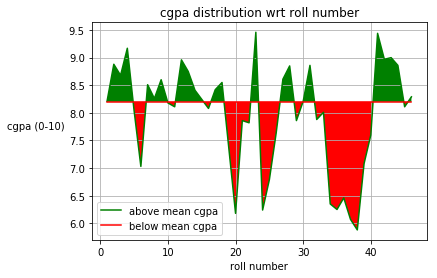

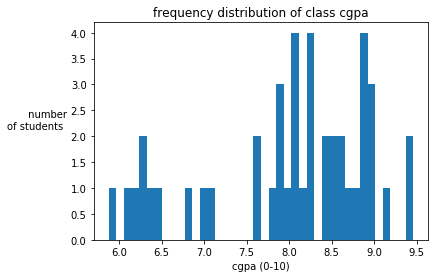

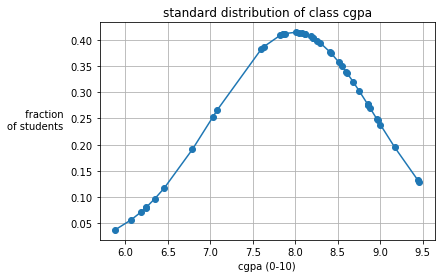

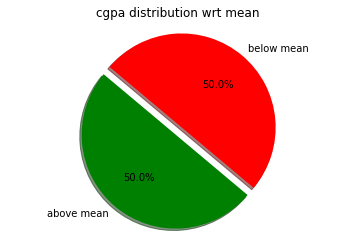

In [9]:

roll_and_cgpa = []
for (k, v) in data.items():
    try:
        roll_and_cgpa.append((k,float(v['cgpa'][2])))
    except:
        pass

    

def sortbycg(l):
   return l[1]

def sortbyroll(l):
    return int(l[0][7:9])


sorted_cgpa = roll_and_cgpa[:]
sorted_cgpa.sort(key=sortbycg)


print("Top 5 Students:\n")
for element in sorted_cgpa[:-6:-1]:
    print('%s '%(element[0]),'%s ' % (data[element[0]]['name']),'%s' %(data[element[0]]['cgpa'][2]))
    
roll_and_cgpa.sort(key=sortbyroll)

# for individual cgpa 

print("Students with theri cgpa :\n")
for element in roll_and_cgpa:
    print('%s '%(element[0]),'%s ' % (data[element[0]]['name']),'%s' %(data[element[0]]['cgpa'][2]))

cgpa = np.array([element[1] for element in roll_and_cgpa], dtype='float')

roll = np.array([element[0][7:9] for element in roll_and_cgpa],dtype='int')


cgpa_average = round(np.mean(cgpa), 2)
cgpa_median = round(np.median(cgpa), 2)
cgpa_highest = round(np.max(cgpa), 2)
cgpa_lowest = round(np.min(cgpa),2)
cgpa_standard_deviation = round(np.std(cgpa),2)

print("\nCGPA:")
print("Highest: %s" % cgpa_highest)
print("lowest: %s"% cgpa_lowest)
print(" Median: %s" % cgpa_median)
print("Average: %s" % cgpa_average)
print("Standard Deviation: %s \n"% cgpa_standard_deviation)

print("   9.5+: %s" % len([cg for cg in cgpa if cg >= 9.5]))
print("  9-9.5: %s" % len([cg for cg in cgpa if cg >= 9 and cg < 9.5]))
print("  8.5-9: %s" % len([cg for cg in cgpa if cg >= 8.5 and cg < 9]))
print("  8-8.5: %s" % len([cg for cg in cgpa if cg >= 8 and cg < 8.5]))
print("  7.5-8: %s" % len([cg for cg in cgpa if cg >= 7.5 and cg < 8]))
print("  7-7.5: %s" % len([cg for cg in cgpa if cg >= 7 and cg < 7.5]))
print("     7-: %s" % len([cg for cg in cgpa if cg < 7]))


unit_array = np.ones(len(roll),dtype='int')
fig,cgpa_plot = plt.subplots()

print('\n')

label=['above mean','below mean']
cgpa_plot.plot(roll,cgpa,label='above mean cgpa',color='green')
cgpa_plot.plot(roll,cgpa_median*unit_array,label='below mean cgpa',color='red')
cgpa_plot.grid(b = True)
cgpa_plot.legend()
cgpa_plot.fill_between(roll,cgpa,cgpa_median*unit_array,where= cgpa >= cgpa_median*unit_array,facecolor = 'green',interpolate = True )
cgpa_plot.fill_between(roll,cgpa,cgpa_median*unit_array,where= cgpa< cgpa_median*unit_array,facecolor = 'red',interpolate = True )
plt.xlabel('roll number')
plt.ylabel('cgpa (0-10)', horizontalalignment='right',rotation =0)
plt.title('cgpa distribution wrt roll number')
plt.show()

print('\n')
#plt.fill(cgpa,cgpa_median*median,'r')g
sorted_cgpa=cgpa[:]
sorted_cgpa.sort()
fig,histo_cgpa = plt.subplots()
histo_cgpa.hist(sorted_cgpa,bins=40)
#histo_cgpa.fill_between(roll,histo_cgpa,where =sorted_cgpa >= 8.0,facecolor = 'green',interpolate = True )
#histo_cgpa.fill(histo_cgpa, where = sorted_cgpa >= cgpa_median)
plt.title('frequency distribution of class cgpa')

plt.xlabel('cgpa (0-10)')
plt.ylabel(' number\nof students ', horizontalalignment='right',rotation =0)
plt.show()
#plt.plot(norm.pdf(cgpa_in_seq,cgpa_median,cgpa_standard_deviation))

print('\n')
fig = norm.pdf(sorted_cgpa, np.mean(sorted_cgpa), np.std(sorted_cgpa))
plt.plot(sorted_cgpa,fig,'-o')
plt.title('standard distribution of class cgpa')
plt.xlabel('cgpa (0-10)')
plt.ylabel(' fraction \nof students ', horizontalalignment='right',rotation =0)
plt.grid(b = True)
plt.show()

above_mean = [cg for cg in cgpa if cg >= cgpa_median]
below_mean = [cg for cg in cgpa if cg < cgpa_median]

print('\n')
labels = 'above mean','below mean'
sizes = [len(above_mean),len(below_mean)]
explode = (0.1,0)
colors = ['green','red']
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%2.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.title('cgpa distribution wrt mean')
plt.show()

# results plot 
this plot shows that students from roll number between 1 to 18 shows a good aveage performance while those at the roll number between 34 to 40 have very low average. these students need to receive better support in coming semester to impove their performance.




https://analytics4all.org/2016/05/05/python-histograms-and-frequency-distribution/

https://etav.github.io/python/count_basic_freq_plot.html for histogram frequency distribution

https://stackoverflow.com/questions/20011494/plot-normal-distribution-with-matplotlib for ploting the standard deviation